In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt #import the entire datetime library as dt
from datetime import date #only import date from the datetime library

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect

import pandas as pd

In [5]:
#since we created repo and moved the climate_starter.ipynb file into repo, you need to go up one level
#database_path= "../Resources/hawaii.sqlite"

In [6]:
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#this runs below:
#engine= create_engine(f"sqlite:///{database_path}")

engine=create_engine("sqlite:///../Resources/hawaii.sqlite", echo=False)

In [7]:
# We can view all of the classes that automap found
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [8]:
#Base.classes.keys()

In [9]:
# Save references to each class of table 
station=Base.classes.station
measurement=Base.classes.measurement


In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [11]:
#engine.execute('SELECT * FROM hawaii LIMIT 5').fetchall()

# Exploratory Climate Analysis

In [161]:
#dt=date.fromisoformat(date.today().strftime('%Y-%m-%d'))
#print(dt)

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
# use order_by (sort first)
# .first gives you the first element of the query
# .desc reverses the sort to give you the last. 

last_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date # last date is 2017-08-23 (confirmed from grading rubric)

#itterate through last_date
for i in last_date:
    #print(i) #prints 2017-08-23
    datetime_obj =date.fromisoformat(i)
    print(datetime_obj)
    
#https://docs.python.org/3/library/datetime.html#datetime.date.year
#https://www.plus2net.com/python/date-fromisoformat.php
one_yr_ago=date(datetime_obj.year, datetime_obj.month,datetime_obj.day)-dt.timedelta(days=365)
one_yr_ago

# Perform a query to retrieve the data and precipitation scores
prcp=session.query(measurement).\
    filter(measurement.date > str(one_yr_ago)).all()


#dictionary of list: 
#append date and prcp to empty list in dict. dict is climate_data.
climate_data={'Date':[], 'Precipitation':[]}
for i in prcp:
    climate_data['Date'].append(i.date)
    climate_data['Precipitation'].append(i.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df=pd.DataFrame(climate_data, index=climate_data['Date'], columns=['Precipitation'])
# Sort the dataframe by date
climate_df=climate_df.sort_index()

#len(climate_df) 2223 doesn't seem right if we want only 1 year of data?
climate_df
# Use Pandas Plotting with Matplotlib to plot the data


2017-08-23


,Precipitation
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00


In [19]:
#one_yr_ago

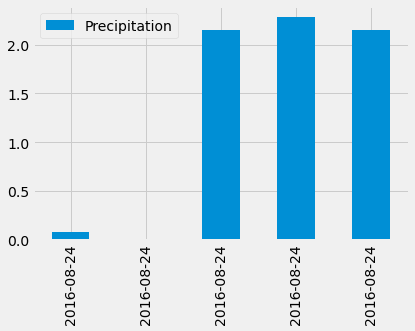

In [43]:
climate_df.head().plot(kind ='bar')
#climate_df.head()

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis=np.arange(len(climate_df))
x_axis
tick_locations=[value for value in x_axis]

array([   0,    1,    2, ..., 2220, 2221, 2222])

Text(0.5, 1.0, 'Hawaii Precipitation by Time')

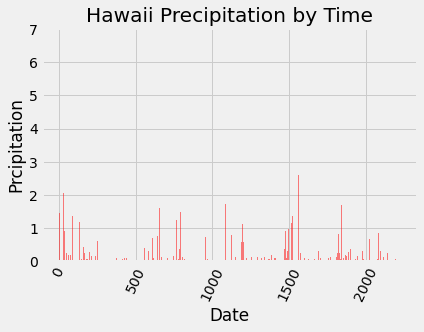

In [44]:
#plt.figure(figsize=(10,10))
plt.bar(x_axis, climate_df['Precipitation'], color='r', alpha=0.5, align='center')
#plt.xticks(tick_locations, climate_df[""])


plt.xlabel('Date')
plt.xticks(rotation=65)
plt.ylabel('Prcipitation')
plt.title("Hawaii Precipitation by Time")

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [165]:
# Design a query to show how many stations are available in this dataset?


In [166]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [167]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [168]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
